# Imports

In [1]:
import pandas as pd
from pathlib import Path  
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
np.random.seed(2019)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from utils import *


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# read features
file_name = 'dataset/features_clean.pkl'
open_file = open(file_name, "rb")
columns = pickle.load(open_file)
open_file.close()

print(columns)

['age', 'fnlwgt', 'education_num', 'occupation', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'target', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed']


In [3]:
original_data = pd.read_csv(
    "dataset/train_clean.csv",
    names=columns,
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")
# input the data and read the data skipping any spaces before/after the commas and mark the values ‘?’ as missing data points

original_test = pd.read_csv(
    "dataset/test_clean.csv",
    names=columns,
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")


data_train= original_data.copy()
data_test = original_test.copy()

In [4]:
print(data_train.shape)
print(data_test.shape)

(32562, 32)
(32562, 32)


In [5]:
data_train.head()

,age,fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country,target,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed
NaN,age,fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country,target,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed
0.0,39,77516,13,0,4,1,2174,0,40,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1.0,50,83311,13,3,4,1,0,0,13,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2.0,38,215646,9,5,4,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3.0,53,234721,7,5,2,1,0,0,40,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [6]:
# removing first rows
data_train = data_train.iloc[1: , :]

In [7]:
data_train.head()

,age,fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,hours_per_week,country,target,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed
0.0,39,77516,13,0,4,1,2174,0,40,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1.0,50,83311,13,3,4,1,0,0,13,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2.0,38,215646,9,5,4,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3.0,53,234721,7,5,2,1,0,0,40,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4.0,28,338409,13,9,2,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [8]:
features = list(filter(lambda a: a != 'target', columns))

In [9]:
X = data_train[features].values
# select features
y = data_train["target"]
# select target
print('total numbers of record: ',X.shape[0])
print('total numbers of features: ',X.shape[1])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

total numbers of record:  32561
total numbers of features:  31


In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
np.isnan(X_train).sum()

0

In [12]:
np.isnan(X_test).sum()

0

# Training the model

In [13]:
lr = logistic_regression(X_train,y_train)
knn = knearestneighbors(X_train,y_train)
nb = naive(X_train,y_train)
dt = decision_tree(X_train,y_train)
svm = svm(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.787 total time=  23.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.784 total time=  23.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.781 total time=  23.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.789 total time=  23.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.780 total time=  28.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   8.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   8.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.821 total time=   8.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=   8.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.822 total time=   8.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.846 total time=   7.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [14]:
filename = 'models/logistic_regression.sav'
pickle.dump(lr, open(filename, 'wb'))

filename = 'models/knn.sav'
pickle.dump(knn, open(filename, 'wb'))

filename = 'models/naive_bayes.sav'
pickle.dump(nb, open(filename, 'wb'))

filename = 'models/decision_tree.sav'
pickle.dump(dt, open(filename, 'wb'))

filename = 'models/svm.sav'
pickle.dump(svm, open(filename, 'wb'))
 

In [15]:
trainingResult(lr,X_test,y_test)
trainingResult(knn,X_test,y_test)
trainingResult(svm,X_test,y_test)
trainingResult(nb,X_test,y_test)
trainingResult(dt,X_test,y_test)

Misclassified samples: 1493
Accuracy: 0.85
Misclassified samples: 1690
Accuracy: 0.83
Misclassified samples: 1455
Accuracy: 0.85
Misclassified samples: 4498
Accuracy: 0.54
Misclassified samples: 1400
Accuracy: 0.86


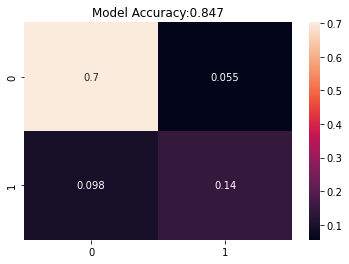

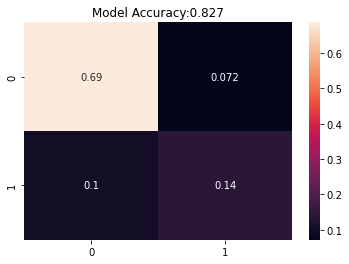

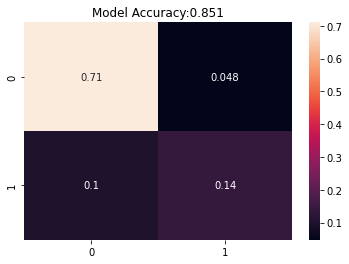

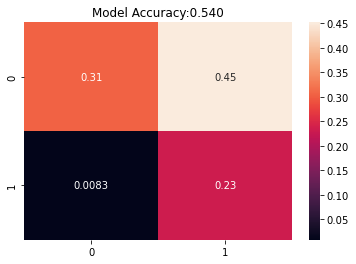

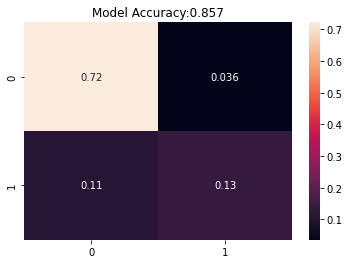

In [20]:
import pandas as pd
def confusion(model,X_test,y_test):
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred,normalize='all')
    df = pd.DataFrame(confusion)
    plt.figure()
    sns.heatmap(df, annot=True)
    plt.title('Model Accuracy:{:.3f}'.format(model.score(X_test, y_test)))
    
confusion(lr,X_test,y_test)
confusion(knn,X_test,y_test)
confusion(svm,X_test,y_test)
confusion(nb,X_test,y_test)
confusion(dt,X_test,y_test)

In [17]:
predictions_lr = lr.predict(X_test)
predictions_knn = knn.predict(X_test)
predictions_svm = svm.predict(X_test)
predictions_nb = nb.predict(X_test)
predictions_dt = dt.predict(X_test)

print("Logistic regression Model:")
print("Accuracy: " + str(accuracy_score(y_test, predictions_lr)))
print(classification_report(y_test, predictions_lr))
print("=======================================================")


print("knn Model:")
print("Accuracy: " + str(accuracy_score(y_test, predictions_knn)))
print(classification_report(y_test, predictions_knn))
print("=======================================================")


print("SVM Model:")
print("Accuracy: " + str(accuracy_score(y_test, predictions_svm)))
print(classification_report(y_test, predictions_svm))
print("=======================================================")

print("Naive Bayes Model:")
print("Accuracy: " + str(accuracy_score(y_test, predictions_nb)))
print(classification_report(y_test, predictions_nb))
print("=======================================================")

print("Decision Tree Model:")
print("Accuracy: " + str(accuracy_score(y_test, predictions_dt)))
print(classification_report(y_test, predictions_dt))
print("=======================================================")

Logistic regression Model:
Accuracy: 0.847169618179957
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7407
           1       0.72      0.60      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

knn Model:
Accuracy: 0.8270037874910431
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7407
           1       0.66      0.58      0.62      2362

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769

SVM Model:
Accuracy: 0.8510594738458389
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7407
           1       0.75      0.58      0.65      2362

    accuracy                           0.85    

NameError: name 'target_names' is not defined

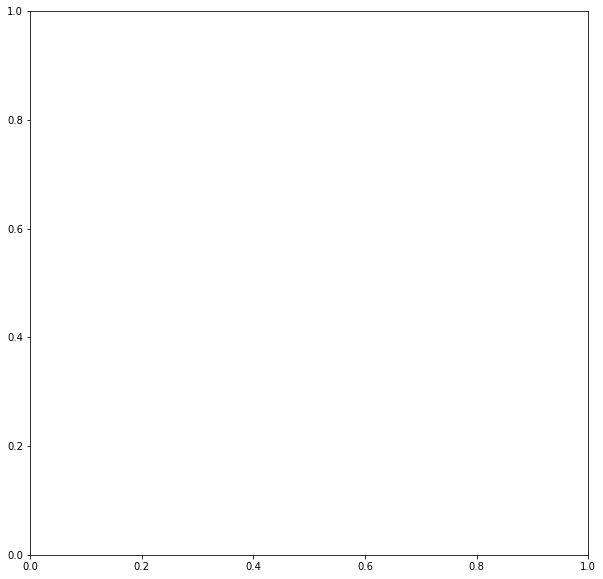

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
 
cm = confusion_matrix(y_test, predictions_dt)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


In [18]:
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)